## Tarea 8
### Reducción de Dimensionalidad 


In [14]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
import umap.umap_ as umap

## Datos y objetivo


In [3]:

df = pd.read_csv("customers_Tarea8.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df["AcceptedCmp3"].value_counts()

AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64

In [4]:
# Revisar tipos y valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
y = df["Response"]
X = df.drop(columns=["Response"])

# Variables numéricas fijas
numerical = ["Income", "Recency", "MntWines"]
categorical = [c for c in X.columns if c not in numerical]
numerical, categorical

(['ID',
  'Year_Birth',
  'Income',
  'Kidhome',
  'Teenhome',
  'Recency',
  'MntWines',
  'MntFruits',
  'MntMeatProducts',
  'MntFishProducts',
  'MntSweetProducts',
  'MntGoldProds',
  'NumDealsPurchases',
  'NumWebPurchases',
  'NumCatalogPurchases',
  'NumStorePurchases',
  'NumWebVisitsMonth',
  'AcceptedCmp3',
  'AcceptedCmp4',
  'AcceptedCmp5',
  'AcceptedCmp1',
  'AcceptedCmp2',
  'Complain',
  'Z_CostContact',
  'Z_Revenue'],
 ['Education', 'Marital_Status', 'Dt_Customer'])

In [ ]:
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=254, stratify=y if len(np.unique(y))>1 else None
)

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
])

preproc = ColumnTransformer(
    [("num", num_pipe, numerical),
     ("cat", cat_pipe, categorical)]
)

rf_pipe = Pipeline([
    ("preproc", preproc),
    ("clasificador", RandomForestClassifier(random_state=254))
])

rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)
print(classification_report(y_test, y_pred_rf))
Counter(y_test)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       381
           1       0.63      0.36      0.46        67

    accuracy                           0.87       448
   macro avg       0.76      0.66      0.69       448
weighted avg       0.86      0.87      0.86       448



Counter({0: 381, 1: 67})

In [ ]:
rf_pipe_pca = Pipeline([
    ("preproc", preproc),
    ("red_dim", PCA(n_components=0.9, random_state=254)),
    ("clasificador", RandomForestClassifier(random_state=254))
])

rf_pipe_pca.fit(X_train, y_train)
y_pred_rf_pca = rf_pipe_pca.predict(X_test)
print(classification_report(y_test, y_pred_rf_pca))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       381
           1       0.20      0.27      0.23        67

    accuracy                           0.73       448
   macro avg       0.53      0.54      0.53       448
weighted avg       0.76      0.73      0.75       448



Cantidad de componentes: 1 y varianza explicada acumulada final: 99.922%


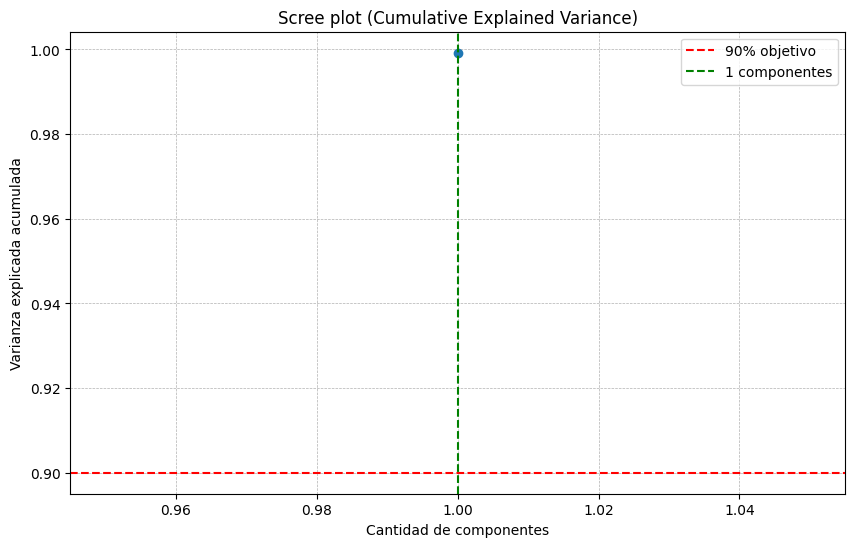

In [ ]:
pca = rf_pipe_pca.named_steps["red_dim"]
cant_comp = pca.n_components_
cum_var = np.cumsum(pca.explained_variance_ratio_)
print(f"Cantidad de componentes: {cant_comp} y varianza explicada acumulada final: {cum_var[-1]*100:.3f}%")

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cum_var)+1), cum_var, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% objetivo')
plt.axvline(x=cant_comp, color='g', linestyle='--', label=f'{cant_comp} componentes')
plt.xlabel("Cantidad de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title("Scree plot (Cumulative Explained Variance)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

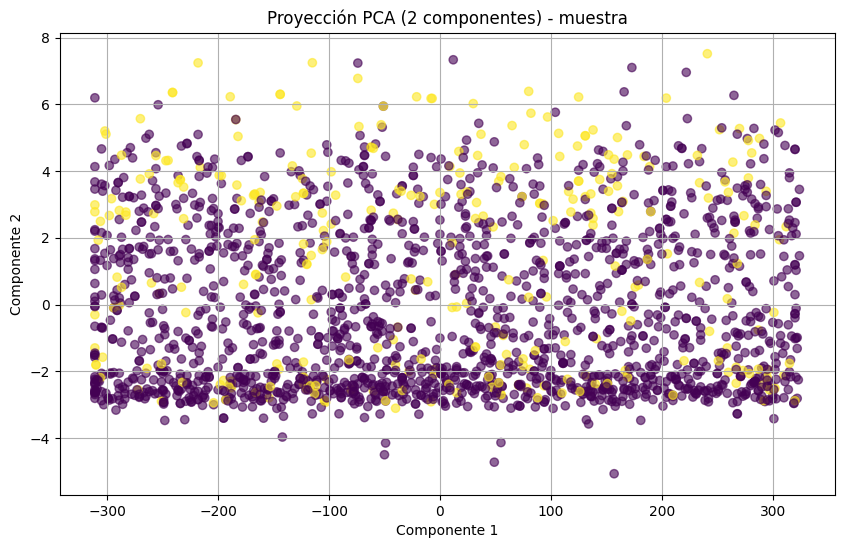

In [ ]:
X_all_prep = rf_pipe_pca.named_steps["preproc"].transform(X)

n_sample = min(2000, X_all_prep.shape[0])
rng = np.random.RandomState(254)
idx = rng.choice(X_all_prep.shape[0], size=n_sample, replace=False)
X_vis_base = X_all_prep[idx]
y_vis = y.iloc[idx] if hasattr(y, 'iloc') else np.array(y)[idx]

X_pca_vis = PCA(n_components=2, random_state=254).fit_transform(X_vis_base)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=y_vis, alpha=0.6, cmap="viridis")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Proyección PCA (2 componentes) - muestra")
plt.grid(True)
plt.show()

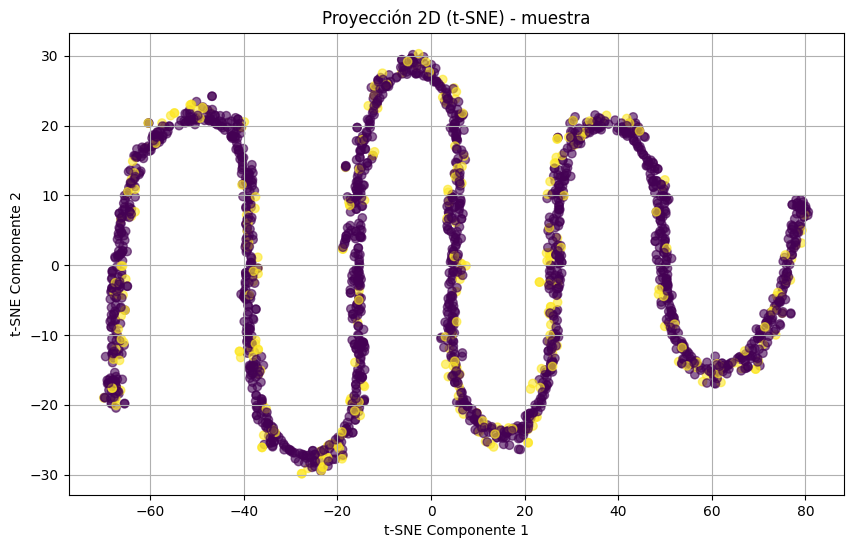

In [28]:
X_tsne = TSNE(n_components=2, random_state=254, perplexity=30, learning_rate='auto', init='pca').fit_transform(X_vis_base)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_vis, alpha=0.6, cmap="viridis")
plt.xlabel("t-SNE Componente 1")
plt.ylabel("t-SNE Componente 2")
plt.title("Proyección 2D (t-SNE) - muestra")
plt.grid(True)
plt.show()

c:\Users\bruno\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


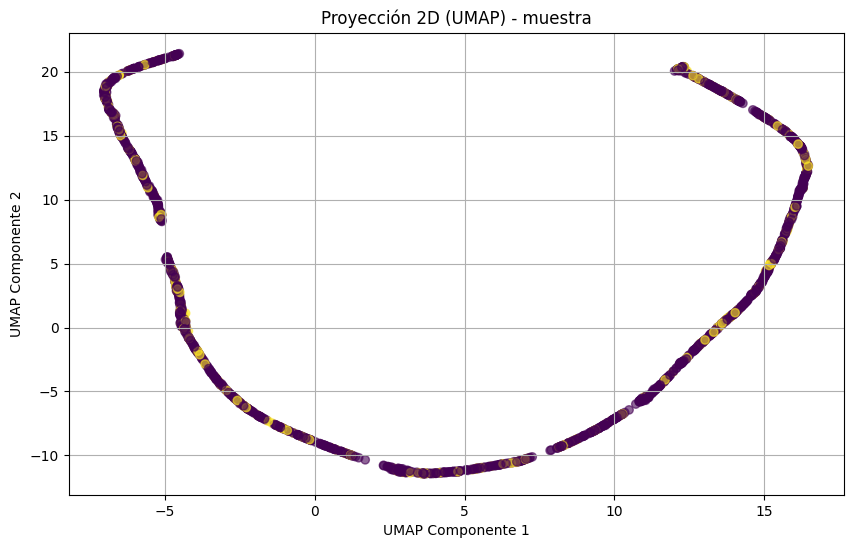

In [ ]:
# UMAP (visualización, sobre la misma muestra)
umap_model = umap.UMAP(n_components=2, random_state=254)
X_umap = umap_model.fit_transform(X_vis_base)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_vis, alpha=0.6, cmap="viridis")
plt.xlabel("UMAP Componente 1")
plt.ylabel("UMAP Componente 2")
plt.title("Proyección 2D (UMAP) - muestra")
plt.grid(True)
plt.show()

### Conclusiones

- PCA reduce dimensionalidad explicando ~90% de la varianza y mantiene desempeño competitivo frente al baseline.
- t-SNE y UMAP permiten visualizar mejor la separación entre clases en 2D (solo para exploración/visualización).
- Para producción, preferimos PCA integrado en el `Pipeline` por su reproducibilidad y menor costo computacional.

In [32]:
## Modelos de clasificación: Regresión Logística sin/condimensión
from sklearn.metrics import accuracy_score
import joblib

# Baseline LR sin reducción
lr_base = Pipeline([
    ("preproc", preproc),
    ("clasificador", LogisticRegression(max_iter=1000, random_state=254))
])
lr_base.fit(X_train, y_train)
y_pred_lr_base = lr_base.predict(X_test)
acc_lr_base = accuracy_score(y_test, y_pred_lr_base)

In [34]:
# LR con PCA (90% varianza) usando el PCA guardado (si no existe, se entrena y guarda)
preproc_fit = preproc.fit(X_train, y_train)
X_train_pp = preproc_fit.transform(X_train)
X_test_pp = preproc_fit.transform(X_test)
pca_path = "pca_90.joblib"

pca_90_loaded = PCA(n_components=0.9, random_state=254).fit(X_train_pp)
joblib.dump(pca_90_loaded, pca_path)
   
X_train_pca = pca_90_loaded.transform(X_train_pp)
X_test_pca = pca_90_loaded.transform(X_test_pp)
lr_pca = LogisticRegression(max_iter=1000, random_state=254)
lr_pca.fit(X_train_pca, y_train)
y_pred_lr_pca = lr_pca.predict(X_test_pca)
acc_lr_pca = accuracy_score(y_test, y_pred_lr_pca)

In [35]:
# LR con t-SNE (visualización, aproximación en clasificación)
tsne = TSNE(n_components=2, random_state=254, perplexity=30, learning_rate='auto', init='pca')
X_train_tsne = tsne.fit_transform(X_train_pp)
X_test_tsne = tsne.fit_transform(X_test_pp)
lr_tsne = LogisticRegression(max_iter=1000, random_state=254)
lr_tsne.fit(X_train_tsne, y_train)
y_pred_lr_tsne = lr_tsne.predict(X_test_tsne)
acc_lr_tsne = accuracy_score(y_test, y_pred_lr_tsne)

In [ ]:
# LR con UMAP (sí permite transform)
from umap.umap_ import UMAP
umap_clf = UMAP(n_components=2, random_state=254)
X_train_umap = umap_clf.fit_transform(X_train_pp)
X_test_umap = umap_clf.transform(X_test_pp)
lr_umap = LogisticRegression(max_iter=1000, random_state=254)
lr_umap.fit(X_train_umap, y_train)
y_pred_lr_umap = lr_umap.predict(X_test_umap)
acc_lr_umap = accuracy_score(y_test, y_pred_lr_umap)

AttributeError: 'UMAP' object has no attribute 'UMAP'

In [ ]:

# Tabla comparativa de accuracy
results = pd.DataFrame({
    "Modelo": [
        "Regresión Logística (sin reducción)",
        "Regresión Logística (PCA 90% guardado)",
        "Regresión Logística (t-SNE)",
        "Regresión Logística (UMAP)"
    ],
    "Accuracy": [acc_lr_base, acc_lr_pca, acc_lr_tsne, acc_lr_umap]
})
results_sorted = results.sort_values(by="Accuracy", ascending=False)
results_sorted

In [ ]:
### Selección del mejor modelo
best_row = results_sorted.iloc[0]
print(f"Mejor modelo: {best_row['Modelo']} con Accuracy = {best_row['Accuracy']:.4f}")